<a href="https://colab.research.google.com/github/alexlib/algae_population_model/blob/master/notebooks/figure1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grazing

Plot 3 

a) grazing - $\sigma$ constant Y as a function of grazing 0-30

b) mechanical destruction young 0 old 50%. 

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

from algae_population import *

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [2]:
import pickle
data = pickle.load(open('figure3.p','rb'))
sigmas = [0., 0.1, 0.2, 0.3, 0.4, 0.5] # <- copy from figure3.ipynb

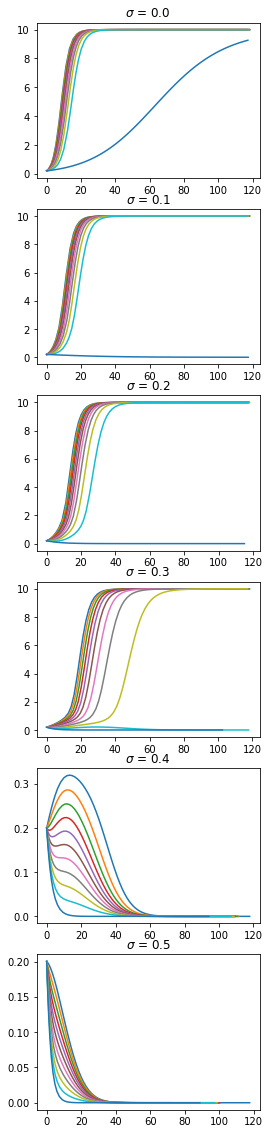

In [3]:
fig, ax = plt.subplots(len(sigmas),1,figsize=(4,20))
for j in range(len(sigmas)):
    for i in range(len(scenarios)):
        # print(j,i)
        # print(data[j][i]['s'][0])
        ind = np.where(data[j][i].t <= 120)[0][-1]      
        ax[j].plot(data[j][i].t[:ind], data[j][i].y[:-1, :ind].sum(axis=0).T, label=data[j][i]['s'][0])
        ax[j].set_title(f'$\sigma$ = {sigmas[j]}')
plt.show()

In [4]:
data = pickle.load(open('figure3.p','rb'))
import numpy as np

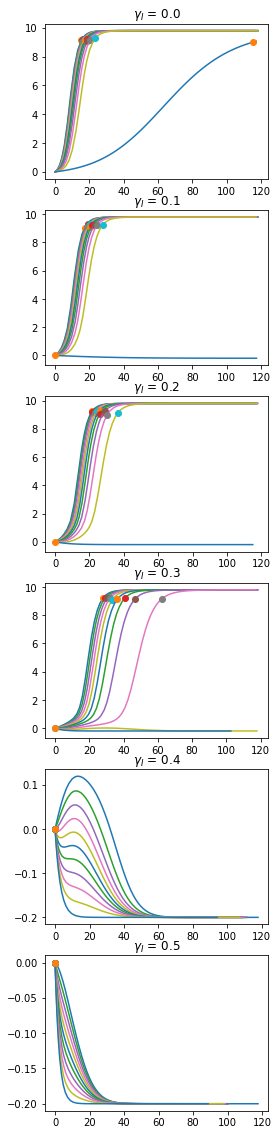

In [5]:
# sigmas = [0., 0.1, 0.2, 0.3, 0.4, 0.5]


settling_time = np.zeros((len(sigmas),len(scenarios)))
fig, ax = plt.subplots(len(sigmas),1,figsize=(4,20))
for j in range(len(sigmas)):
    for i in range(len(scenarios)):
        # print(j,i)
        # print(data[j][i]['s'][0])
        ind = np.where(data[j][i].t <= 120)[0][-1]
        biomass = data[j][i].y[:-1, :ind].sum(axis=0).T
        revenue = biomass - 0.2
        settling = np.argmax(revenue >= 0.9*K)
        settling_time[j][i] =  settling
        ax[j].plot(data[j][i].t[:ind], revenue, label=data[j][i]['s'][0])
        ax[j].plot(data[j][i].t[settling], revenue[settling],'o')
        ax[j].set_title(f'$\gamma_I$ = {sigmas[j]}')
plt.show()

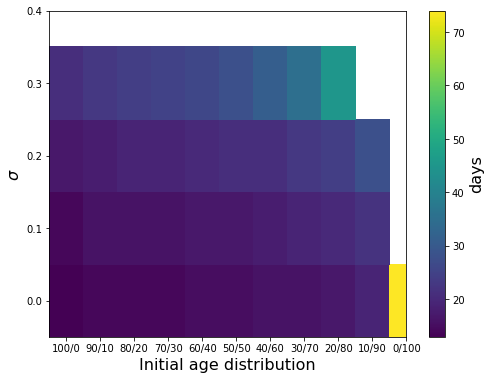

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
settling_time[settling_time == 0] = np.nan
hmap = ax.pcolor(settling_time, shading='auto')
cbar = plt.colorbar(hmap)
ax.set_ylim([0,4])
ax.set_xlim([0,10])
cbar.set_label('days',fontsize=16)#, rotation=270)
plt.xticks(ticks=np.arange(11)+0.5,labels=scenarios.keys())
plt.yticks(ticks=np.arange(len(sigmas[:-1]))+0.5,labels=np.round(sigmas[:-1],2))
plt.xlabel(r'Initial age distribution',fontsize=16)
plt.ylabel(r'$\sigma$',fontsize=16);

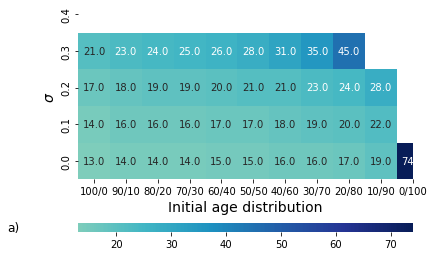

In [7]:
import seaborn as sns

grid_kws = {"height_ratios": (.9, .05), "hspace": .5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

# fig, ax = plt.subplots(figsize=(8,6))
settling_time[settling_time == 0] = np.nan
# hmap = ax.pcolor(settling_time, shading='auto')
hmap = sns.heatmap(settling_time,ax=ax, 
    cbar_ax=cbar_ax, 
    cbar_kws={"orientation": "horizontal"}, 
    center=25,
    cmap="YlGnBu",
    annot=True, fmt=".1f")
# cbar = plt.colorbar(hmap)
ax.set_ylim([0,4])
ax.set_xlim([0,10])
# bar_ax.set_label('days',fontsize=16)#, rotation=270)
ax.set_xticks(ticks=np.arange(11)+0.5,labels=scenarios.keys())
ax.set_yticks(ticks=np.arange(len(sigmas[:-1]))+0.5,labels=np.round(sigmas[:-1],2))
ax.set_xlabel(r'Initial age distribution',fontsize=14)
ax.set_ylabel(r'$\sigma$',fontsize=14);
# ax.grid('on',color='white',linestyle=':')
plt.text(0.1,0.1,'a)',color='black',fontsize=12);

